
## <b>1 <span style='color:#e61227'>|</span> Generate data by reducing the number of images with large bouding boxes by 80% </b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1.1 |</span></b> Install And Import Essential Libreries </b></p>
</div>

In [19]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
from collections import Counter
import shutil
import numpy as np
import csv


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1.2 |</span></b> Displays the area distribution of raw data </b></p>
</div>

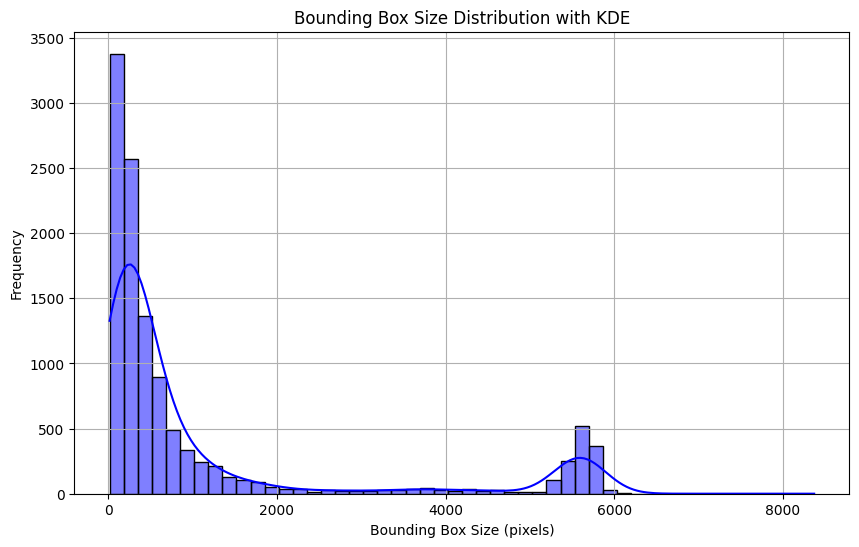

In [5]:
json_file_path = r'C:\Users\LAPTOP\Desktop\Traffic Sign Detection With Yolo\via-trafficsign-coco-20210321\annotations\train.json'

with open(json_file_path, 'r') as f:
    data = json.load(f)

bbox_sizes = []
for annotation in data['annotations']:
    bbox = annotation['bbox']
    width = bbox[2]
    height = bbox[3]
    bbox_size = width * height
    bbox_sizes.append(bbox_size)

plt.figure(figsize=(10, 6))
sns.histplot(bbox_sizes, bins=50, kde=True, color='blue')
plt.title('Bounding Box Size Distribution with KDE')
plt.xlabel('Bounding Box Size (pixels)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1.3 |</span></b> Split Data ( - 80%/100% The number of image with a large bouding box size) </b></p>
</div>

In [ ]:
json_file_path = # Path to the original JSON file
image_directory = # Path to the directory containing the images ( converted to Yolo format)
output_image_directory = # Path to the directory where the filtered images will be saved
os.makedirs(output_image_directory, exist_ok=True)

with open(json_file_path, 'r') as f:
    data = json.load(f)

image_paths = []
category_count = {}
invalid_annotations = []

for annotation in data['annotations']:
    bbox = annotation['bbox']
    width = bbox[2]
    height = bbox[3]
    bbox_size = width * height
    
    if 5040 <= bbox_size <= 6250:
        image_id = annotation['image_id']
        for image in data['images']:
            if image['id'] == image_id:
                image_path = image['file_name']
                full_image_path = os.path.join(image_directory, image_path)
                image_paths.append((full_image_path, annotation))
                
                category_id = annotation['category_id']
                if category_id in category_count:
                    category_count[category_id].append(annotation)
                else:
                    category_count[category_id] = [annotation]
                break
    else:
        invalid_annotations.append(annotation)

num_images = len(image_paths)
print(f"Number of images with bounding box size between 5040 and 6250 pixels: {num_images}")

filtered_annotations = []
for category_id, annotations in category_count.items():
    random.shuffle(annotations)
    filtered_annotations.extend(annotations[:int(len(annotations) * 0.2)])

for annotation in invalid_annotations:
    image_id = annotation['image_id']
    for image_info in data['images']:
        if image_info['id'] == image_id:
            image_path = image_info['file_name']
            full_image_path = os.path.join(image_directory, image_path)
            new_image_path = os.path.join(output_image_directory, image_path)
            shutil.copy(full_image_path, new_image_path)
            break

final_annotations = filtered_annotations + invalid_annotations

filtered_data = {
    "images": data['images'],
    "annotations": final_annotations,
    "categories": data['categories']
}

filtered_json_file_path = # Path to save the filtered JSON file ( result of data after filtering)

with open(filtered_json_file_path, 'w') as f:
    json.dump(filtered_data, f)

print(f"Filtered data saved to {filtered_json_file_path}")



<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1.4 |</span></b> Visualize data after processing the image with a large bouding box area </b></p>
</div>

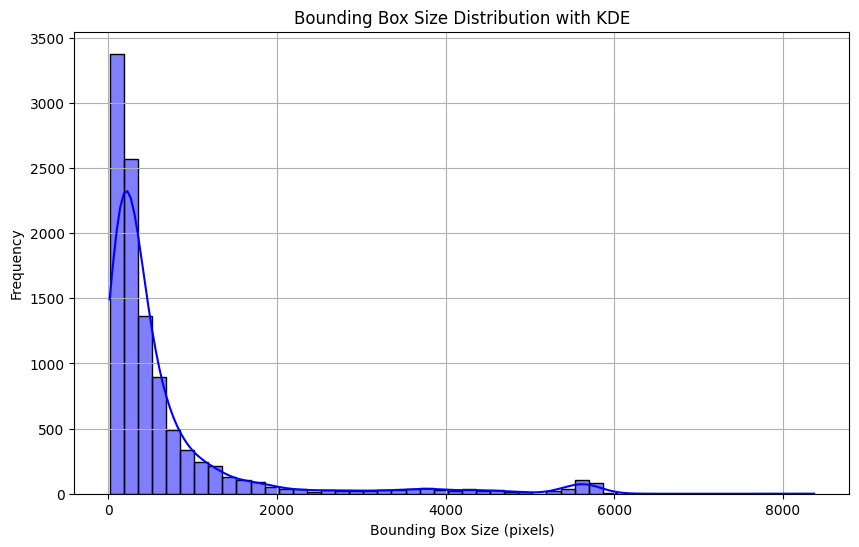

In [7]:
json_file_path = r'C:\Users\LAPTOP\Desktop\Traffic Sign Detection With Yolo\Data(-80%)_bbox_area\annotations\train.json'

with open(json_file_path, 'r') as f:
    data = json.load(f)

bbox_sizes = []
for annotation in data['annotations']:
    bbox = annotation['bbox']  # bbox format is [x, y, width, height]
    width = bbox[2]
    height = bbox[3]
    bbox_size = width * height
    bbox_sizes.append(bbox_size)

plt.figure(figsize=(10, 6))
sns.histplot(bbox_sizes, bins=50, kde=True, color='blue')
plt.title('Bounding Box Size Distribution with KDE')
plt.xlabel('Bounding Box Size (pixels)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The number of images with a large bouding box area

***1.4.1 Bounding Box Size Distribution with KDE (Detailed Area)***

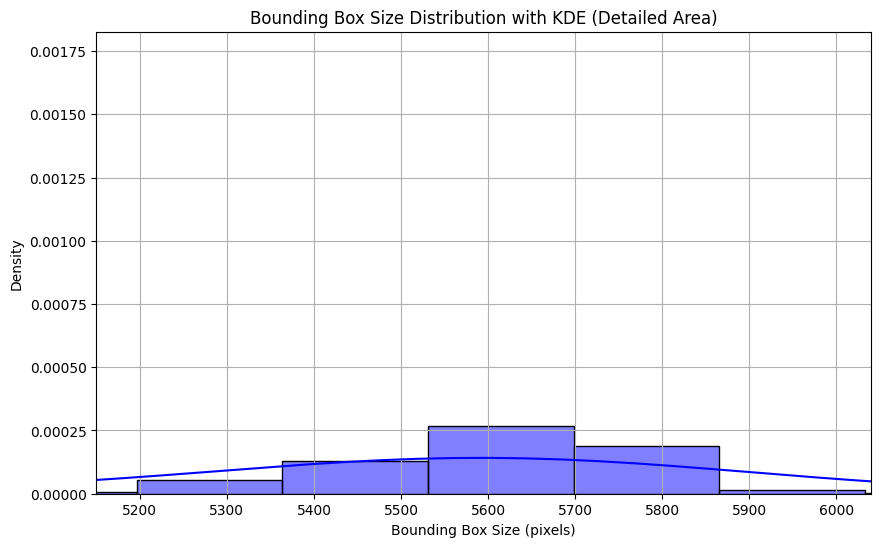

In [9]:
json_file_path = r'C:\Users\LAPTOP\Desktop\Traffic Sign Detection With Yolo\via-trafficsign-coco-20210321\annotations\train.json'

with open(json_file_path, 'r') as f:
  data = json.load(f)

bbox_sizes = []
for annotation in data['annotations']:
  bbox = annotation['bbox'] 
  width = bbox[2]
  height = bbox[3]
  bbox_size = width * height
  bbox_sizes.append(bbox_size)

min_value = 5150  # Minimum value: 2000/12=166.67 (12 bins), 166.67*7=1166.67
max_value = 6040  # Maximum value 

plt.figure(figsize=(10, 6))
sns.histplot(bbox_sizes, bins=50, kde=True, color='blue', stat="density") 
plt.xlim(min_value, max_value)
plt.title('Bounding Box Size Distribution with KDE (Detailed Area)')
plt.xlabel('Bounding Box Size (pixels)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


***1.4.2 Number of images with bounding box size between 5040 and 6250 pixels***

Number of images with bounding box size between 5040 and 6250 pixels: 253


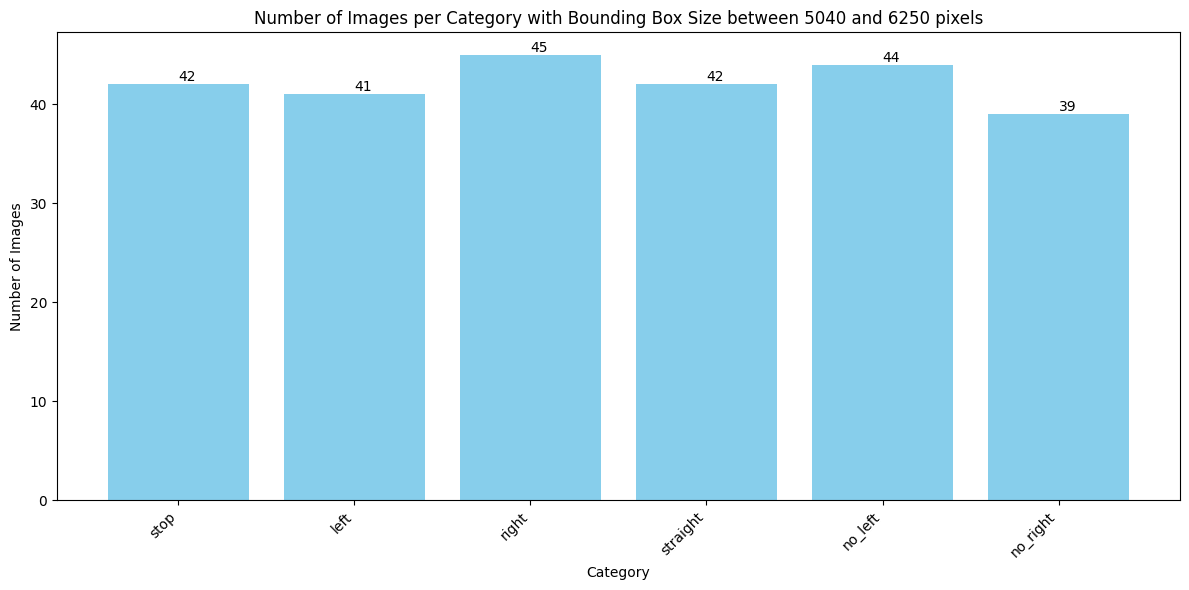

In [8]:
=
json_file_path = r'C:\Users\LAPTOP\Desktop\Traffic Sign Detection With Yolo\Data(-80%)_bbox_area\annotations\train.json'
image_directory = r'C:\Users\LAPTOP\Desktop\Traffic Sign Detection With Yolo\Data(-80%)_bbox_area\train'

with open(json_file_path, 'r') as f:
    data = json.load(f)

image_paths = []
category_count = {}


for annotation in data['annotations']:
    bbox = annotation['bbox'] 
    width = bbox[2]
    height = bbox[3]
    bbox_size = width * height
    
    if 5040 <= bbox_size <= 6250:
        image_id = annotation['image_id']
        # Tìm thông tin ảnh tương ứng trong phần images của JSON
        for image in data['images']:
            if image['id'] == image_id:
                image_path = image['file_name']
                full_image_path = os.path.join(image_directory, image_path)
                image_paths.append(full_image_path)
                
                # Lấy nhãn của annotation
                category_id = annotation['category_id']
                if category_id in category_count:
                    category_count[category_id] += 1
                else:
                    category_count[category_id] = 1
                break

num_images = len(image_paths)
print(f"Number of images with bounding box size between 5040 and 6250 pixels: {num_images}")

categories = [data['categories'][i]['name'] for i in range(len(data['categories'])) if data['categories'][i]['id'] in category_count]
counts = [category_count[data['categories'][i]['id']] for i in range(len(data['categories'])) if data['categories'][i]['id'] in category_count]

plt.figure(figsize=(12, 6))
bars = plt.bar(categories, counts, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # va: vertical alignment

plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Number of Images per Category with Bounding Box Size between 5040 and 6250 pixels')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


***1.4.3 Result***

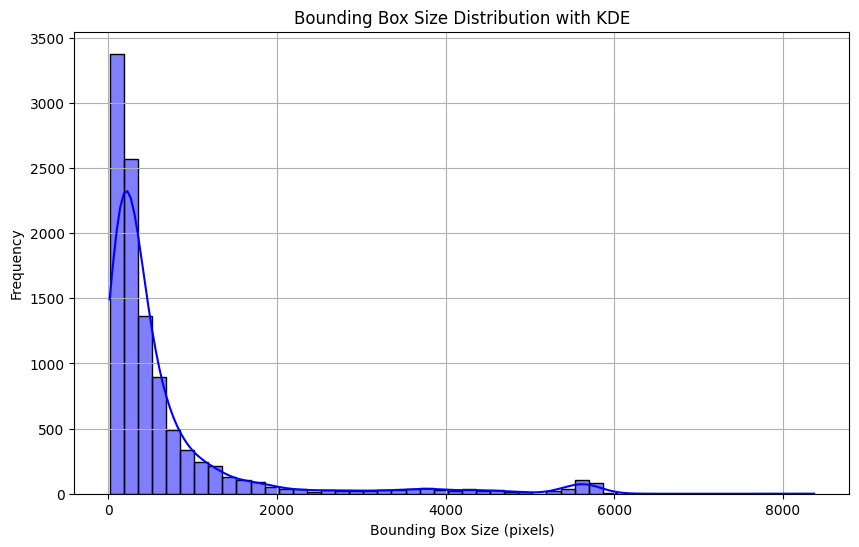

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_19684\1990253595.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_names, y=category_frequencies, palette='viridis')


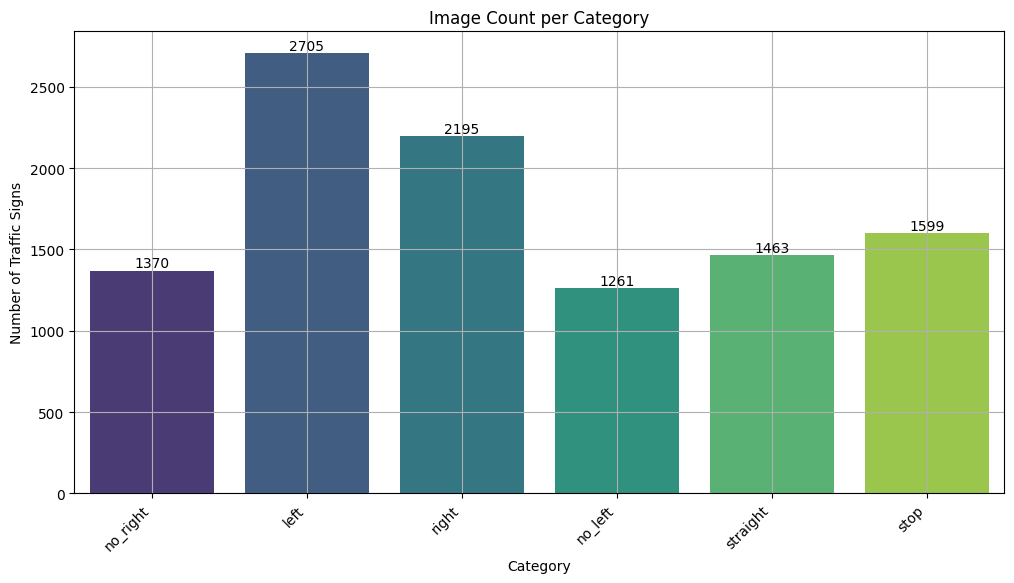

In [10]:
json_file_path = r'C:\Users\LAPTOP\Desktop\Traffic Sign Detection With Yolo\Data(-80%)_bbox_area\annotations\train.json'

with open(json_file_path, 'r') as f:
    data = json.load(f)

bbox_sizes = []
category_counts = {}

category_id_to_name = {category['id']: category['name'] for category in data['categories']}

for annotation in data['annotations']:
    bbox = annotation['bbox']  
    width = bbox[2]
    height = bbox[3]
    bbox_size = width * height
    bbox_sizes.append(bbox_size)
    
    category_id = annotation['category_id']
    if category_id in category_counts:
        category_counts[category_id] += 1
    else:
        category_counts[category_id] = 1

# bounding box
plt.figure(figsize=(10, 6))
sns.histplot(bbox_sizes, bins=50, kde=True, color='blue')
plt.title('Bounding Box Size Distribution with KDE')
plt.xlabel('Bounding Box Size (pixels)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# convert category_id list to category name
category_names = [category_id_to_name[category_id] for category_id in category_counts.keys()]
category_frequencies = list(category_counts.values())

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=category_names, y=category_frequencies, palette='viridis')
plt.title('Image Count per Category')
plt.xlabel('Category')
plt.ylabel('Number of Traffic Signs')

for i in range(len(category_names)):
    ax.text(i, category_frequencies[i] + 0.5, str(category_frequencies[i]), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

***1.4.4 Check the number of label distributions on 1 photo or multiple signs***

Number of images with one traffic sign: 8487
Number of images with multiple traffic signs: 957


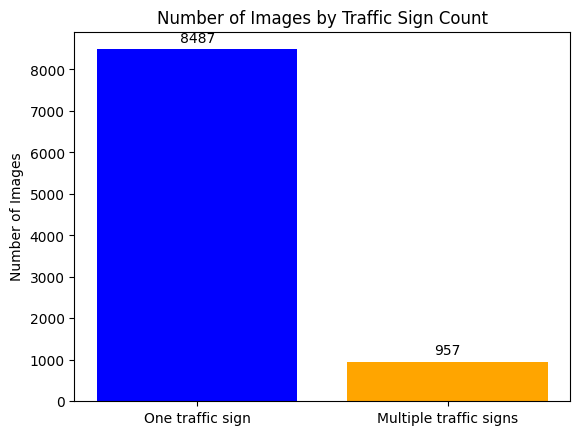

In [11]:
json_file_path = r'C:\Users\LAPTOP\Desktop\Traffic Sign Detection With Yolo\Data(-80%)_bbox_area\annotations\train.json'
image_directory = r'C:\Users\LAPTOP\Desktop\Traffic Sign Detection With Yolo\Data(-80%)_bbox_area\train'

with open(json_file_path, 'r') as f:
    data = json.load(f)

# từ điển để đếm số lượng annotations cho mỗi ảnh
image_annotation_count = {}

# số lượng annotations cho mỗi ảnh
for annotation in data['annotations']:
    image_id = annotation['image_id']
    if image_id in image_annotation_count:
        image_annotation_count[image_id] += 1
    else:
        image_annotation_count[image_id] = 1

single_sign_images = 0
multiple_sign_images = 0

for count in image_annotation_count.values():
    if count == 1:
        single_sign_images += 1
    else:
        multiple_sign_images += 1

print(f"Number of images with one traffic sign: {single_sign_images}")
print(f"Number of images with multiple traffic signs: {multiple_sign_images}")

labels = ['One traffic sign', 'Multiple traffic signs']
counts = [single_sign_images, multiple_sign_images]

fig, ax = plt.subplots()
bars = ax.bar(labels, counts, color=['blue', 'orange'])
ax.set_ylabel('Number of Images')
ax.set_title('Number of Images by Traffic Sign Count')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

***1.4.5 Check the number of label distributions on 1 photo or multiple signs in large bouding box***

Number of images with one traffic sign (bbox size 5040-6250): 253
Number of images with multiple traffic signs (bbox size 5040-6250): 0


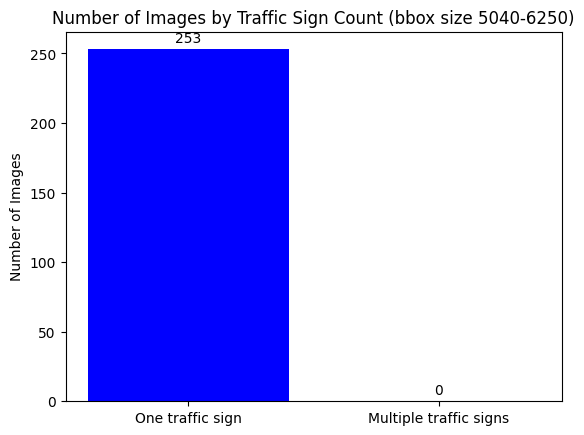

In [12]:

json_file_path = r'C:\Users\LAPTOP\Desktop\Traffic Sign Detection With Yolo\Data(-80%)_bbox_area\annotations\train.json'
image_directory = r'C:\Users\LAPTOP\Desktop\Traffic Sign Detection With Yolo\Data(-80%)_bbox_area\train'
with open(json_file_path, 'r') as f:
    data = json.load(f)

image_annotation_count = {}

for annotation in data['annotations']:
    bbox = annotation['bbox'] 
    width = bbox[2]
    height = bbox[3]
    bbox_size = width * height
    
    if 5040 <= bbox_size <= 6250:
        image_id = annotation['image_id']
        if image_id in image_annotation_count:
            image_annotation_count[image_id] += 1
        else:
            image_annotation_count[image_id] = 1

single_sign_images = 0
multiple_sign_images = 0

for count in image_annotation_count.values():
    if count == 1:
        single_sign_images += 1
    else:
        multiple_sign_images += 1

print(f"Number of images with one traffic sign (bbox size 5040-6250): {single_sign_images}")
print(f"Number of images with multiple traffic signs (bbox size 5040-6250): {multiple_sign_images}")

labels = ['One traffic sign', 'Multiple traffic signs']
counts = [single_sign_images, multiple_sign_images]

fig, ax = plt.subplots()
bars = ax.bar(labels, counts, color=['blue', 'orange'])
ax.set_ylabel('Number of Images')
ax.set_title('Number of Images by Traffic Sign Count (bbox size 5040-6250)')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()



## <b>2 <span style='color:#e61227'>|</span> Generate data by deleting an entire photo with a large bouding box </b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>2.1 |</span></b> Define data </b></p>
</div>

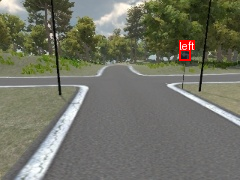

In [1]:
%run display_boudingbox.py


***2.1.1 Show data information***

In [20]:
# Define paths
train_folder = r"C:\Users\LAPTOP\Desktop\Traffic Sign Detection With Yolo\data(nolargebbox)"
images_folder = os.path.join(train_folder, 'train', 'images')
labels_folder = os.path.join(train_folder, 'train','labels')
output_csv = os.path.join(train_folder, 'original_data(check).csv')

# Get list of all image filenames
image_filenames = [f for f in os.listdir(images_folder) if f.endswith('.jpg')]

print(image_filenames)

['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg', '00011.jpg', '00012.jpg', '00013.jpg', '00014.jpg', '00015.jpg', '00016.jpg', '00017.jpg', '00018.jpg', '00019.jpg', '00020.jpg', '00021.jpg', '00022.jpg', '00023.jpg', '00024.jpg', '00025.jpg', '00026.jpg', '00027.jpg', '00028.jpg', '00029.jpg', '00030.jpg', '00031.jpg', '00032.jpg', '00033.jpg', '00034.jpg', '00035.jpg', '00036.jpg', '00037.jpg', '00038.jpg', '00039.jpg', '00040.jpg', '00041.jpg', '00042.jpg', '00043.jpg', '00044.jpg', '00045.jpg', '00046.jpg', '00047.jpg', '00048.jpg', '00049.jpg', '00050.jpg', '00051.jpg', '00052.jpg', '00053.jpg', '00054.jpg', '00055.jpg', '00056.jpg', '00057.jpg', '00058.jpg', '00059.jpg', '00060.jpg', '00061.jpg', '00062.jpg', '00063.jpg', '00064.jpg', '00065.jpg', '00066.jpg', '00067.jpg', '00068.jpg', '00069.jpg', '00070.jpg', '00071.jpg', '00072.jpg', '00073.jpg', '00074.jpg', '00075.jpg', '00076.jpg', '00077.jpg'

***2.1.2 Convert file to csv file***

In [21]:
# Prepare to write to CSV
with open(output_csv, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    # Write header
    csv_writer.writerow(['image_name', 'class_id', ['x_center', 'y_center', 'width', 'height'],'centroid','bb_size'])
    
    # Process each image file
    for image_filename in image_filenames:
        image_name = os.path.splitext(image_filename)[0]
        label_filename = image_name + '.txt'
        label_path = os.path.join(labels_folder, label_filename)
        
        if os.path.exists(label_path):
            with open(label_path, 'r') as label_file:
                for line in label_file:
                    class_id = line.strip().split()[0]
                    [x_center, y_center, width, height] = map(float, line.strip().split()[1:5])
                    centroid = [x_center, y_center]
                    bb_size = width*height
                    csv_writer.writerow([image_filename, class_id, [x_center, y_center, width, height],centroid,bb_size])

print(f'Annotations have been successfully saved to {output_csv}')

Annotations have been successfully saved to C:\Users\LAPTOP\Desktop\Traffic Sign Detection With Yolo\data(nolargebbox)\original_data(check).csv


**Distribution of Bounding Box Areas (Raw data)**

![alt text](image.png)

In [22]:
def visualize_bb_area_distribution_from_csv(csv_file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file_path)
    df[['x_center', 'y_center', 'width', 'height']] = df["['x_center', 'y_center', 'width', 'height']"].apply(
        lambda x: pd.Series(eval(x))
    )

    df['bb_area'] = df['width'] * df['height']
    plt.figure(figsize=(12, 6))
    sns.histplot(df['bb_area'], bins=100, kde=True, color='blue')
    plt.title('Distribution of Bounding Box Areas')
    plt.xlabel('Bounding Box Area')
    plt.ylabel('Frequency')
    plt.show()

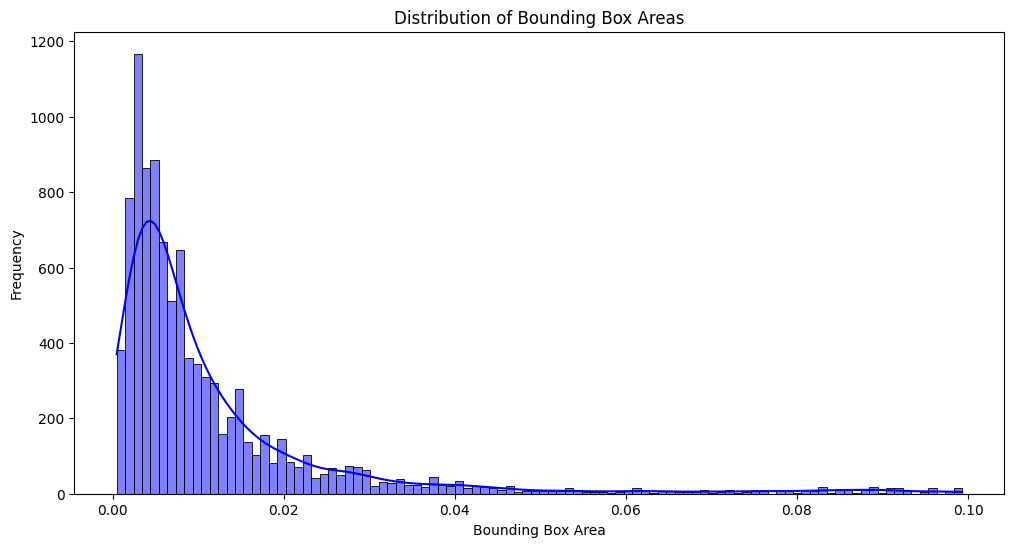

In [23]:
csv_file_path = r'C:\Users\LAPTOP\Desktop\Traffic Sign Detection With Yolo\data(nolargebbox)\original_data(check).csv'
visualize_bb_area_distribution_from_csv(csv_file_path)

In [24]:
# Read the info.csv file
df = pd.read_csv(r'C:\Users\LAPTOP\Desktop\Traffic Sign Detection With Yolo\data(nolargebbox)\original_data(check).csv')

# Count the quantity of each traffic sign
sign_counts = df['class_id'].value_counts()

# Print the sign counts
for class_id, count in sign_counts.items():
    print(f'Traffic Sign ID {class_id}: {count} occurrences')

Traffic Sign ID 1: 2569 occurrences
Traffic Sign ID 2: 2118 occurrences
Traffic Sign ID 0: 1462 occurrences
Traffic Sign ID 3: 1360 occurrences
Traffic Sign ID 5: 1245 occurrences
Traffic Sign ID 4: 1189 occurrences


***2.1.3 Label Distribution***

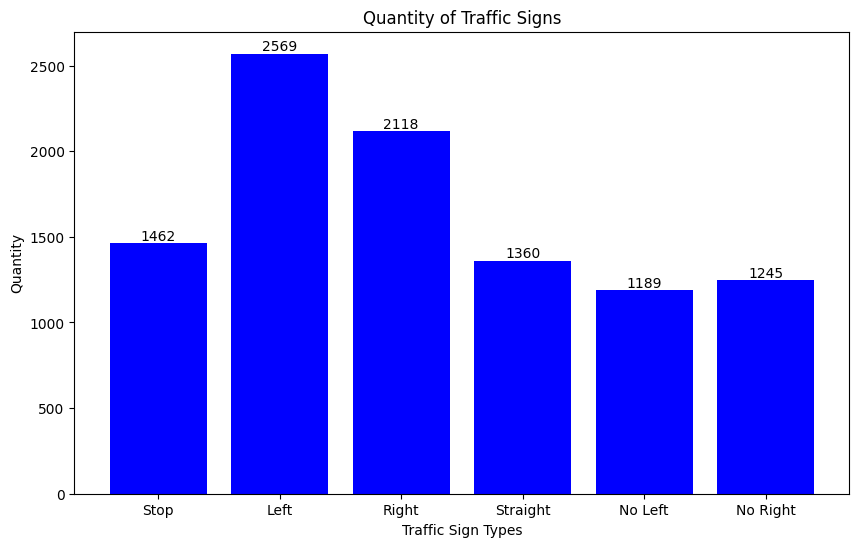

In [25]:
class_id_to_name = {
    0: "Stop",
    1: "Left",
    2: "Right",
    3: "Straight",
    4: "No Left",
    5: "No Right"
}

# Get the class_ids and counts
class_ids = list(class_id_to_name.keys())
counts = [sign_counts.get(class_id, 0) for class_id in class_ids]

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(class_id_to_name.values(), counts, color='blue')
plt.xlabel('Traffic Sign Types')
plt.ylabel('Quantity')
plt.title('Quantity of Traffic Signs')

# Add count labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.show()

***2.1.4 Multiple Traffic Sign***

In [26]:
# Filter the dataframe to include only images with more than one unique class_id
multi_filtered_df = df.groupby('image_name').filter(lambda x: len(x['class_id']) > 1)

# Count the quantity of each traffic sign
multi_sign_counts = multi_filtered_df['class_id'].value_counts()

# Print the sign counts
for class_id, count in multi_sign_counts.items():
    print(f'Traffic Sign ID {class_id}: {count} occurrences')

Traffic Sign ID 0: 529 occurrences
Traffic Sign ID 3: 342 occurrences
Traffic Sign ID 1: 255 occurrences
Traffic Sign ID 5: 245 occurrences
Traffic Sign ID 2: 244 occurrences
Traffic Sign ID 4: 241 occurrences


In [27]:
print(len(multi_filtered_df['image_name'].unique()))

841


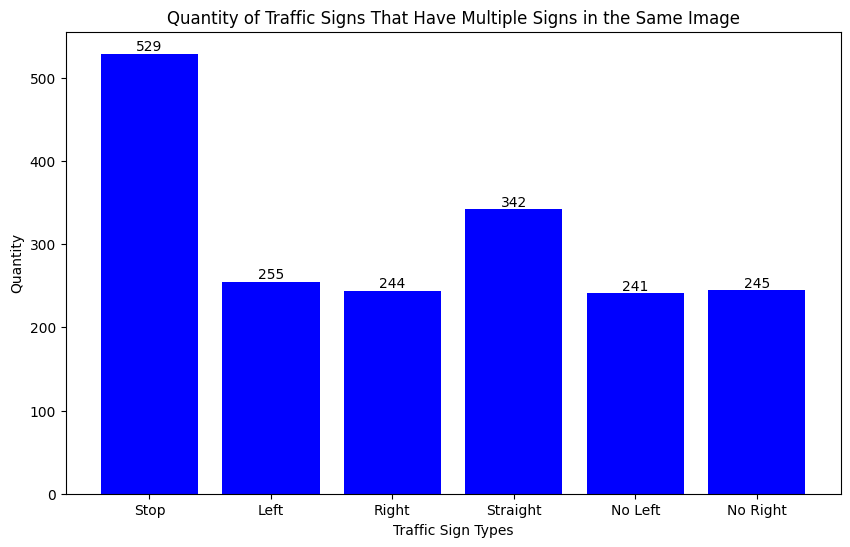

In [28]:
class_id_to_name = {
    0: "Stop",
    1: "Left",
    2: "Right",
    3: "Straight",
    4: "No Left",
    5: "No Right"
}

# Get the class_ids and counts
class_ids = list(class_id_to_name.keys())
multi_counts = [multi_sign_counts.get(class_id, 0) for class_id in class_ids]

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(class_id_to_name.values(), multi_counts, color='blue')
plt.xlabel('Traffic Sign Types')
plt.ylabel('Quantity')
plt.title('Quantity of Traffic Signs That Have Multiple Signs in the Same Image')

# Add count labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.show()

***2.1.5 One Traffic Signs***

In [29]:
# Filter the dataframe to include only images with more than one unique class_id
one_filtered_df = df.groupby('image_name').filter(lambda x: len(x['class_id']) == 1)

# Count the quantity of each traffic sign
one_sign_counts = one_filtered_df['class_id'].value_counts()

# Print the sign counts
for class_id, count in one_sign_counts.items():
    print(f'Traffic Sign ID {class_id}: {count} occurrences')

Traffic Sign ID 1: 2314 occurrences
Traffic Sign ID 2: 1874 occurrences
Traffic Sign ID 3: 1018 occurrences
Traffic Sign ID 5: 1000 occurrences
Traffic Sign ID 4: 948 occurrences
Traffic Sign ID 0: 933 occurrences


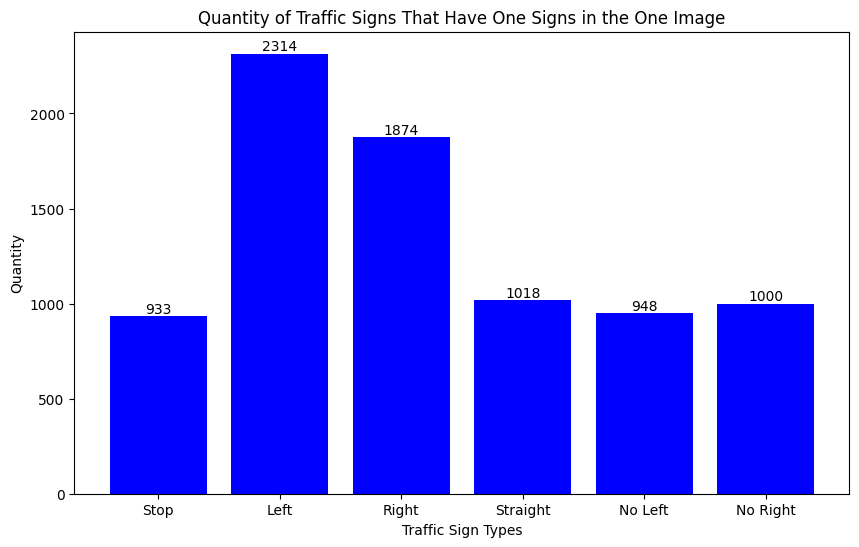

In [30]:
# Get the class_ids and counts
class_ids = list(class_id_to_name.keys())
one_counts = [one_sign_counts.get(class_id, 0) for class_id in class_ids]

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(class_id_to_name.values(), one_counts, color='blue')
plt.xlabel('Traffic Sign Types')
plt.ylabel('Quantity')
plt.title('Quantity of Traffic Signs That Have One Signs in the One Image')

# Add count labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.show()

***2.1.6 Quantity of Traffic Signs by Class ID***

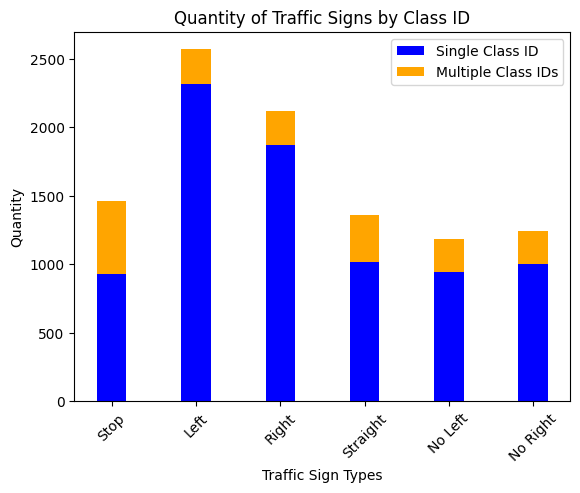

In [31]:
# Get the class names and counts
class_names = list(class_id_to_name.values())
one_counts = list(one_counts)
multi_counts = list(multi_counts)

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r = range(len(class_names))

# Plot the stacked column chart
plt.bar(r, one_counts, color='blue', width=bar_width,  label='Single Class ID')
plt.bar(r, multi_counts, color='orange', width=bar_width, bottom=one_counts,label='Multiple Class IDs')

# Add labels, title, and legend
plt.xlabel('Traffic Sign Types')
plt.ylabel('Quantity')
plt.title('Quantity of Traffic Signs by Class ID')
plt.xticks(r, class_names, rotation=45)
plt.legend()

# Show the chart
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>2.2 |</span></b> Create Perfact Data </b></p>
</div>

In [32]:
left_filtered_df = one_filtered_df[one_filtered_df['class_id'] == 1]
print(len(left_filtered_df))

2314


In [33]:
right_filtered_df = one_filtered_df[one_filtered_df['class_id'] == 2]
print(len(right_filtered_df))

1874


In [34]:
left_indices_to_drop = left_filtered_df.index[::2] # Drop 1 image every 2 image 

rows_to_drop = df.loc[left_indices_to_drop]

rows_to_drop = rows_to_drop['image_name'].to_list()

indices_to_drop = df[df['image_name'].isin(rows_to_drop)].index

left_rows_to_drop = df.loc[indices_to_drop]

df_filtered = df.drop(indices_to_drop)

df_filtered.to_csv(r'C:\Users\LAPTOP\Desktop\Traffic Sign Detection With Yolo\data(nolargebbox)\original_data(check).csv', index=False) # Save the filtered dataframe to a CSV file


In [35]:
print(left_rows_to_drop)

     image_name  class_id ['x_center', 'y_center', 'width', 'height']  \
87    00088.jpg         1    [0.583333, 0.311111, 0.045833, 0.061111]   
89    00090.jpg         1    [0.608333, 0.316667, 0.054167, 0.066667]   
91    00092.jpg         1    [0.620833, 0.311111, 0.054167, 0.066667]   
93    00094.jpg         1        [0.654167, 0.316667, 0.05, 0.066667]   
95    00096.jpg         1      [0.679167, 0.316667, 0.0625, 0.066667]   
...         ...       ...                                         ...   
9933  10283.jpg         1    [0.520833, 0.344444, 0.091667, 0.122222]   
9935  10285.jpg         1                [0.525, 0.35, 0.1, 0.138889]   
9937  10287.jpg         1    [0.529167, 0.355556, 0.116667, 0.155556]   
9939  10289.jpg         1    [0.533333, 0.355556, 0.129167, 0.172222]   
9941  10291.jpg         1             [0.545833, 0.366667, 0.15, 0.2]   

                  centroid   bb_size  
87    [0.583333, 0.311111]  0.002801  
89    [0.608333, 0.316667]  0.003611  
91    

In [36]:
left_rows_to_drop.to_csv(r'C:\Users\LAPTOP\Desktop\Traffic Sign Detection With Yolo\data(nolargebbox)\left_remove.csv', index=False) # Save the removed rows to a CSV file

In [37]:
right_indices_to_drop = right_filtered_df.index[::3] # cứ 3 ảnh xóa 1 ảnh

rows_to_drop = df_filtered.loc[right_indices_to_drop]
rows_to_drop = rows_to_drop['image_name'].to_list()

indices_to_drop = df_filtered[df_filtered['image_name'].isin(rows_to_drop)].index

right_rows_to_drop = df_filtered.loc[indices_to_drop]

df = df_filtered.drop(indices_to_drop)

df.to_csv(r'C:\Users\LAPTOP\Desktop\Traffic Sign Detection With Yolo\data(nolargebbox)\original_data(check).csv', index=False) # Save the filtered dataframe to a CSV file

In [38]:
print(right_rows_to_drop)

     image_name  class_id ['x_center', 'y_center', 'width', 'height']  \
47    00048.jpg         2           [0.825, 0.316667, 0.05, 0.061111]   
50    00051.jpg         2    [0.533333, 0.311111, 0.058333, 0.066667]   
53    00054.jpg         2    [0.558333, 0.311111, 0.066667, 0.088889]   
56    00057.jpg         2    [0.579167, 0.311111, 0.066667, 0.077778]   
59    00060.jpg         2          [0.625, 0.316667, 0.075, 0.094444]   
...         ...       ...                                         ...   
9719  10069.jpg         2        [0.45, 0.311111, 0.066667, 0.111111]   
9722  10072.jpg         2        [0.45, 0.311111, 0.066667, 0.111111]   
9725  10075.jpg         2        [0.45, 0.311111, 0.070833, 0.111111]   
9728  10078.jpg         2           [0.45, 0.311111, 0.075, 0.105556]   
9731  10081.jpg         2           [0.45, 0.311111, 0.075, 0.116667]   

                  centroid   bb_size  
47       [0.825, 0.316667]  0.003056  
50    [0.533333, 0.311111]  0.003889  
53    

In [39]:
right_rows_to_drop.to_csv(r'C:\Users\LAPTOP\Desktop\Traffic Sign Detection With Yolo\data(nolargebbox)\right_remove.csv', index=False) # Save the removed rows to a CSV file

In [40]:
print(df)

     image_name  class_id ['x_center', 'y_center', 'width', 'height']  \
0     00001.jpg         3      [0.6375, 0.322222, 0.045833, 0.055556]   
1     00002.jpg         3    [0.645833, 0.322222, 0.041667, 0.055556]   
2     00003.jpg         3    [0.645833, 0.316667, 0.045833, 0.061111]   
3     00004.jpg         3        [0.641667, 0.322222, 0.05, 0.061111]   
4     00005.jpg         3          [0.6375, 0.322222, 0.05, 0.055556]   
...         ...       ...                                         ...   
9934  10284.jpg         1    [0.520833, 0.344444, 0.095833, 0.127778]   
9936  10286.jpg         1       [0.525, 0.355556, 0.104167, 0.138889]   
9938  10288.jpg         1    [0.529167, 0.355556, 0.120833, 0.161111]   
9940  10290.jpg         1    [0.541667, 0.361111, 0.141667, 0.183333]   
9942  10292.jpg         1      [0.545833, 0.366667, 0.1625, 0.216667]   

                  centroid   bb_size  
0       [0.6375, 0.322222]  0.002546  
1     [0.645833, 0.322222]  0.002315  
2     

***2.2.1 Sign statistics***

In [41]:
# Count the quantity of each traffic sign
sign_counts = df['class_id'].value_counts()

# Print the sign counts
for class_id, count in sign_counts.items():
    print(f'Traffic Sign ID {class_id}: {count} occurrences')

Traffic Sign ID 2: 1493 occurrences
Traffic Sign ID 0: 1462 occurrences
Traffic Sign ID 1: 1412 occurrences
Traffic Sign ID 3: 1360 occurrences
Traffic Sign ID 5: 1245 occurrences
Traffic Sign ID 4: 1189 occurrences


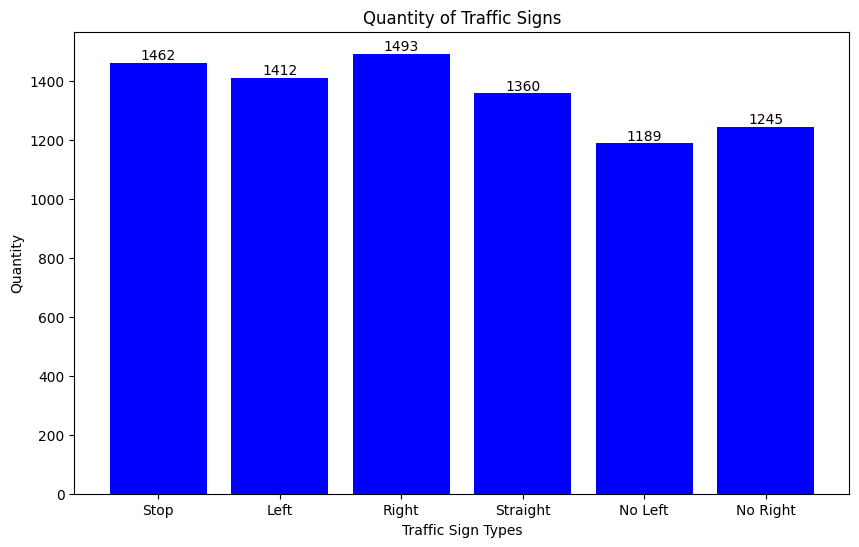

In [42]:
# Get the class_ids and counts
class_ids = list(class_id_to_name.keys())
counts = [sign_counts.get(class_id, 0) for class_id in class_ids]

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(class_id_to_name.values(), counts, color='blue')
plt.xlabel('Traffic Sign Types')
plt.ylabel('Quantity')
plt.title('Quantity of Traffic Signs')

# Add count labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.show()

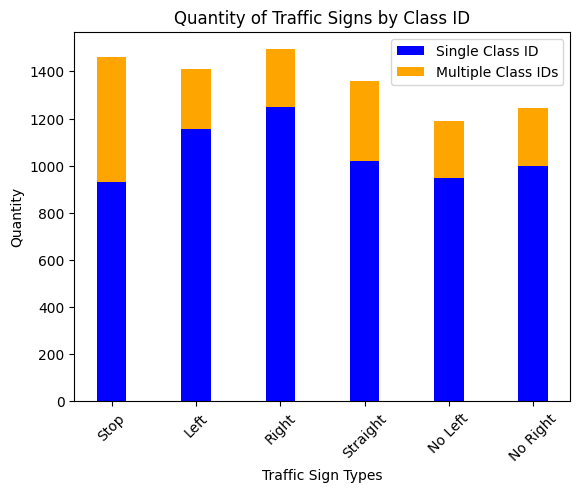

In [43]:
class_ids = list(class_id_to_name.keys())

one_filtered_df = df.groupby('image_name').filter(lambda x: len(x['class_id']) == 1)
one_sign_counts = one_filtered_df['class_id'].value_counts()
one_counts = [one_sign_counts.get(class_id, 0) for class_id in class_ids]

# Get the class names and counts
class_names = list(class_id_to_name.values())
one_counts = list(one_counts)
multi_counts = list(multi_counts)

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r = range(len(class_names))

# Plot the stacked column chart
plt.bar(r, one_counts, color='blue', width=bar_width,  label='Single Class ID')
plt.bar(r, multi_counts, color='orange', width=bar_width, bottom=one_counts,label='Multiple Class IDs')

# Add labels, title, and legend
plt.xlabel('Traffic Sign Types')
plt.ylabel('Quantity')
plt.title('Quantity of Traffic Signs by Class ID')
plt.xticks(r, class_names, rotation=45)
plt.legend()

# Show the chart
plt.show()